# Reporting on sales data
## 📖 Background
- Work for the account department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area
## Tasks
- Capture sales by payment method
- Know average unit price for each product line
- Look for extra insights about data

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

# Report
# 1. What are the total sales for each payment method?
The total sales for each payment method are:

- Transfer: **159.64 k dls - 225 entries**
- Credit card: **110.27k dls - 659 entries**
- Cash: **19.19k dls - 116 entries**

# 2. What is the average unit price for each product line?

- Engine: -------------------- **60.091803** avg unit price
- Frame & body: ----------- **42.832229** avg unit price 
- Suspension & traction: -- **33.969868** avg unit price
- Electrical system: -------- **25.585130** avg unit price
- Miscellaneous: ----------- **22.810738** avg unit price
- Breaking system: -------- **17.740522** avg unit price

# 3. Insights
## Total sales per warehouse:
- Central:  **141,982.88** dls
- North:    **100,203.63** dls
- West:      **46,926.49** dls

## Average quantity | total amount (dls) by client type:

Supsension & traction and Frame & body are the line products with the biggest total amount for both Retail and Wholesale. It´s quite particular that Engine have the first place when we talk about the average quantity for Wholesale, while for Retail is more less equal to the other line products. For Retail, the average amount of items are more less equal around 5.2, but for Wholesale the average increments by 400% for every product line, being 22 the average.

 #### Retail   	
- Suspension & traction: --      5.745763 || **34.71k**
- Frame & body:    -----------   5.367188 || **29.54k**
- Electrical system:  -------    5.561290 || **21.85k**
- Engine:    ------------------- 5.812500 || **16.70k**
- Breaking system:  -------      4.925714 || **15.2k**
- Miscellaneous:   ----------    5.521739 || **11.4k**
#### Wholesale 
- Frame & body:     -----------  24.526316 || **39.47k**
- Suspension & traction:   --    22.117647 || **38.29k**
- Breaking system:    --------   23.054545 || **23.13k**
- Electrical system: -------     22.000000 || **21.75k**
- Engine:  -------------------   26.769231 || **21.23k**
- Miscellaneous:   ----------    22.266667 || **15.74k**

## Top 2 product line per warehouse per client

As we know the **Central** warehouse is the one with the biggest income from the total sales. The income of the central warehouse from Retail comes from Suspension & traction and Frame & body, but the difference between these two are almost 4k dls, mean while for Wholesale comes from Engine, Frame & body and Suspension & traction and the difference is more less equal between this three. 

As we can see the **North** and **West** warehouse have an interesting point, the total sales from both are equal of the **Central** warehouse. If we look only in the North warehouse the income from Frame & body for Wholesale is bigger to the Central top 2 product line in both Retail and Wholesale, while the Suspension & traction amount is more less equal. 

The **West** warehouse is the smallest one if we compare it to the Center and North. It´s income looks like is almost 1/3 of the Central warehouse total sales. Even so, the top 2 for Wholesale are Breaking system and Suspension & traction and for Retail, Frame & body and Electrical system.

## Sales per week

Making a time analysis it looks like from the first three weeks from 2021/06/06 to 2021/07/04  we have an increase, with a slightly decrease in 06/27 but then reaching a peak in sales in 2021/07/04. After that a fall for 3 weeks and then we rocket on 08/08 and the we drop again. Meaning we have two groups one from **06/20 - 07/04** and **08/01 - 08/15**, beign the 2nd more narrowed than the other one.
If we look from from the warehouses all follow the same pattern.



# Exploratory Data Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


## Sales per payment method

       payment      total
2     Transfer  159642.33
1  Credit card  110271.57
0         Cash   19199.10

Credit card    659
Transfer       225
Cash           116
Name: payment, dtype: int64


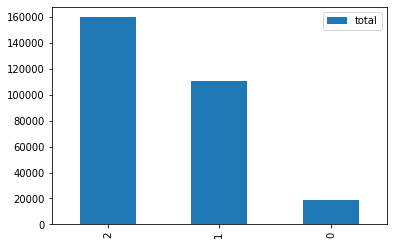

In [ ]:
total_sales_payment_method = df.groupby('payment')[['total']].sum().reset_index().sort_values(by='total',ascending=False)
print(total_sales_payment_method)
print()
print(df.payment.value_counts())

total_sales_payment_method.plot(kind='bar')
plt.show()

## Avg unit price per product line

                       unit_price
product_line                     
Engine                  60.091803
Frame & body            42.832229
Suspension & traction   33.969868
Electrical system       25.585130
Miscellaneous           22.810738
Breaking system         17.740522


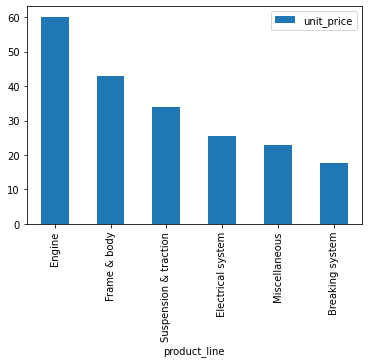

In [ ]:
avg_unit_price_product_line = df.groupby('product_line')[['unit_price']].mean().sort_values(by='unit_price',ascending=False)
print(avg_unit_price_product_line)

avg_unit_price_product_line.plot(kind='bar')
plt.show()

## Total sales per warehouse

               total
warehouse           
Central    141982.88
North      100203.63
West        46926.49


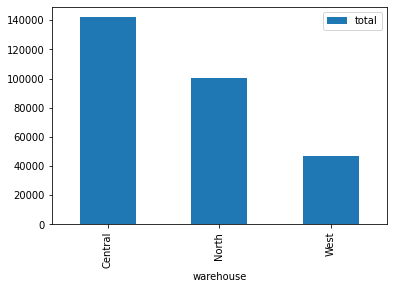

In [ ]:
total_sales_per_warehouse = df.groupby('warehouse')[['total']].sum().sort_values(by='total',ascending=False)
print(total_sales_per_warehouse)
total_sales_per_warehouse.plot(kind='bar')
plt.show()

## Average quantity | total amount (dls) by client type

                                    quantity
client_type product_line                    
Retail      Breaking system         4.925714
            Electrical system       5.561290
            Engine                  5.812500
            Frame & body            5.367188
            Miscellaneous           5.521739
            Suspension & traction   5.745763
Wholesale   Breaking system        23.054545
            Electrical system      22.000000
            Engine                 26.769231
            Frame & body           24.526316
            Miscellaneous          22.266667
            Suspension & traction  22.117647


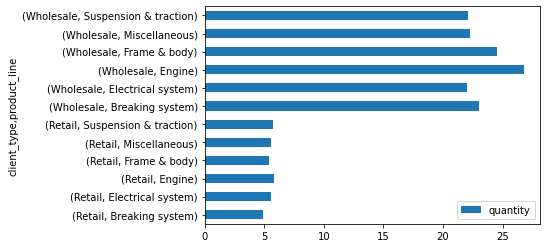

In [ ]:
avg_units_client_type = df.groupby(['client_type','product_line'])[['quantity']].mean()
print(avg_units_client_type)

avg_units_client_type.plot(kind='barh')
plt.show()

                                      total
client_type product_line                   
Retail      Breaking system        15219.25
            Electrical system      21858.30
            Engine                 16709.33
            Frame & body           29546.84
            Miscellaneous          11418.01
            Suspension & traction  34718.94
Wholesale   Breaking system        23130.90
            Electrical system      21754.41
            Engine                 21236.05
            Frame & body           39477.89
            Miscellaneous          15747.81
            Suspension & traction  38295.27


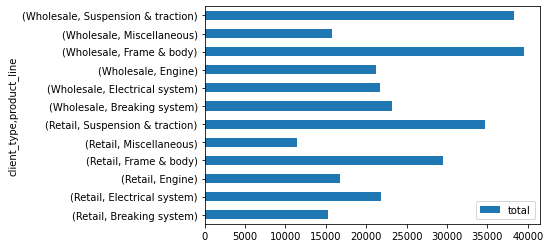

In [ ]:
client_product_total = df.groupby(['client_type','product_line'])[['total']].sum()
print(client_product_total)
client_product_total.plot(kind='barh')
plt.show()

## Total amount of product line per warehouse and client

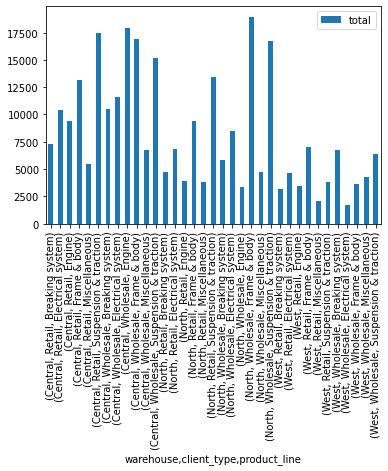

In [ ]:
date_warehouse_product_total = df.groupby(['warehouse','client_type','product_line'])[['total']].sum()
#date_warehouse_product_total
date_warehouse_product_total.plot(kind='bar')
plt.show()

## Average sales per week and average sales per week and warehouse

<AxesSubplot:xlabel='date'>

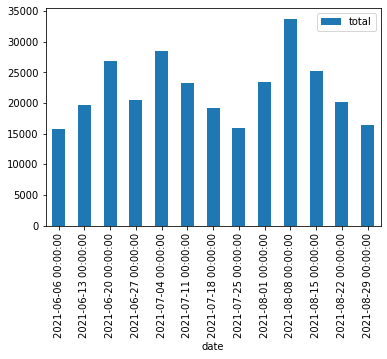

In [ ]:
weekly_sales = df.resample('W', on='date')[['total']].sum()
#weekly_sales
weekly_sales.plot(kind='bar')

<AxesSubplot:xlabel='warehouse,date'>

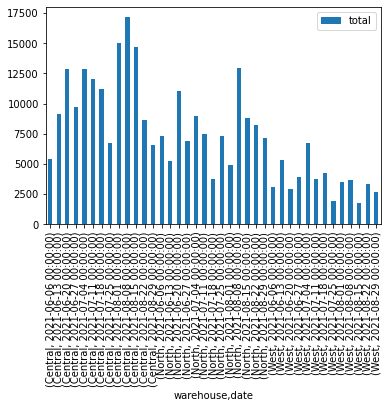

In [ ]:
weekly_sales_per_werehouse = df.groupby(['warehouse',pd.Grouper(key='date',freq='W')])[['total']].sum()
#weekly_sales_per_werehouse
weekly_sales_per_werehouse.plot(kind='bar')